In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [2]:
raw_data=pd.read_csv("train.csv")
raw_data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,10.142889,-15.675620,3.583176,-22.397489,27.221894,-34.110924,-0.072829,-0.544444,0.997601,-2.691778,...,1.916575,5.240820,euorpe,2.431170,0.454074,-18.572032,-14.291524,0.178579,18.110170,0
1,-52.214630,5.847135,-10.902843,-14.132351,20.588574,36.107322,0.115023,0.276093,-0.699168,-0.972708,...,0.370941,-3.794542,asia,2.592326,31.921833,3.317139,10.037003,-1.930870,-3.486898,0
2,67.718500,2.064334,12.394186,-18.667102,47.465504,-50.373658,0.253707,1.068968,2.939713,2.691218,...,1.449817,12.470532,asia,7.143821,9.401490,-10.604968,7.643215,-0.842198,-79.358236,0
3,-28.003111,8.565128,-8.592092,5.918960,-3.224154,78.315783,-0.879845,1.176889,-2.414752,0.589646,...,-3.274733,3.484450,asia,-4.998195,-20.312810,14.818524,-9.180674,1.356972,14.475681,0
4,80.703016,30.736353,-30.101857,-21.201140,-91.946233,-47.469246,-0.646831,-0.578398,0.980849,-1.426112,...,-0.644261,4.082783,asia,-0.012556,-29.334324,1.734433,-12.262072,-0.043228,-19.003881,0


In [3]:
raw_data.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x94,x95,x96,x97,x98,x99,y
count,39986.000000,39990.000000,39994.000000,39990.000000,39994.000000,39990.000000,39993.000000,39987.000000,39994.000000,39993.000000,...,39993.000000,39998.000000,39994.000000,39989.000000,39993.000000,39985.000000,39993.000000,39995.000000,39987.000000,40000.000000
mean,8.259955,-3.249786,1.030666,-0.747566,0.283820,-1.773510,-0.000232,-0.016107,-0.651093,-0.014688,...,-14.274809,0.011390,0.003948,-0.050510,-0.007572,-0.629241,-1.986671,0.036482,1.486887,0.201175
std,38.374182,15.171131,24.732185,15.225730,42.240018,42.124100,1.065955,3.382644,2.947472,1.906496,...,154.038206,3.311041,8.763944,4.979690,19.238210,16.915222,14.375663,5.633052,36.926796,0.400884
min,-140.780478,-64.493908,-105.388182,-63.804916,-158.195975,-169.237259,-4.133490,-12.966970,-12.037625,-7.446200,...,-674.004008,-12.807938,-38.121111,-21.578977,-87.669573,-77.010252,-57.709983,-23.588876,-154.559512,0.000000
25%,-17.800204,-13.458580,-15.565461,-11.078276,-28.246509,-30.391354,-0.723098,-2.299081,-2.628856,-1.299759,...,-116.645845,-2.218739,-5.925508,-3.435180,-12.895717,-11.948902,-11.686033,-3.770599,-23.559519,0.000000
50%,8.354662,-3.386601,1.132995,-0.714888,0.292788,-1.753365,0.001105,-0.003556,-0.659223,-0.028170,...,-11.471306,-0.006726,0.009306,-0.037111,0.124945,-0.481374,-2.026059,0.041838,1.465346,0.000000
75%,33.829780,6.881661,17.677615,9.552404,28.719663,26.844781,0.715844,2.259972,1.322101,1.263469,...,90.101751,2.238996,5.909011,3.299108,12.988509,10.793171,7.611660,3.840100,26.548474,0.000000
max,177.399176,62.906822,99.394915,59.338352,179.342581,170.894497,5.311653,16.619445,14.994937,7.300186,...,603.911528,14.982369,35.785334,20.983463,78.785164,70.182932,60.481075,22.759016,143.126382,1.000000


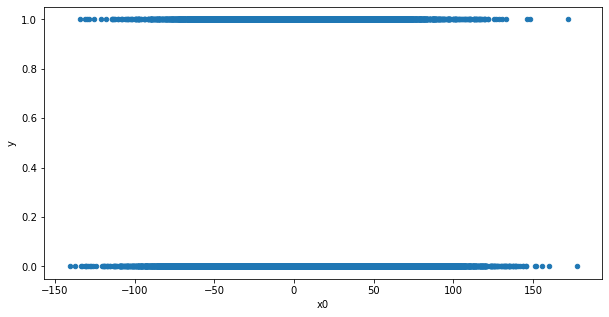

In [4]:
raw_data.plot(kind='scatter',x='x0',y='y',figsize=(10,5))

In [5]:
raw_data["x93"].replace({
    'europe': 0,
    'america': 1,
    'asia': 2
}, inplace=True)

    

In [6]:
q = raw_data["x93"]

In [7]:
print(q)

0        euorpe
1             2
2             2
3             2
4             2
          ...  
39995         2
39996         2
39997         1
39998         1
39999         2
Name: x93, Length: 40000, dtype: object


In [8]:
raw_data["x68"].replace({
    'January': 0,
    'Feb': 1,
    'Mar': 2,
    'Apr':3,
    'May':4,
    'Jun':5,
    'July':6,
    'Aug':7,
    'sept.':8,
    'Oct':9,
    'Nov':10,
    'Dec':11
    
}, inplace=True)


In [9]:
qq = raw_data["x68"]

In [10]:
print(qq)

0        5
1        6
2        6
3        4
4        6
        ..
39995    7
39996    8
39997    6
39998    9
39999    6
Name: x68, Length: 40000, dtype: object


In [11]:
data=pd.read_csv("train1.csv")

In [12]:
data=(data-data.mean())/(data.max()-data.min())
data.head()


,x0,y
0,0.003453,-0.192192
1,-0.276301,-0.192192
2,0.261755,-0.192192
3,-0.167681,-0.192192
4,0.320008,-0.192192


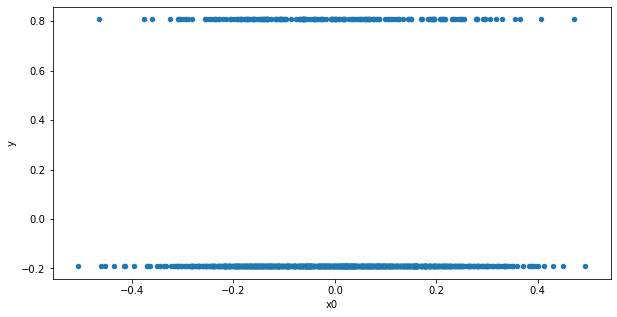

In [13]:
data.plot(kind='scatter',x='x0',y='y',figsize=(10,5))

In [14]:
data.shape
data.insert(0,'ones',1)
data.head()

,ones,x0,y
0,1,0.003453,-0.192192
1,1,-0.276301,-0.192192
2,1,0.261755,-0.192192
3,1,-0.167681,-0.192192
4,1,0.320008,-0.192192


In [15]:
cols=data.shape[1]
print(cols)

3


In [16]:
x=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]

In [17]:
x=np.matrix(x)
y=np.matrix(y)
theta=np.matrix(np.array([0,0]))

In [18]:
x.shape,theta.shape,y.shape

((999, 2), (1, 2), (999, 1))

In [19]:
def computeError(x,y,theta):
    inner=np.power(((x*theta.T)-y),2)
    return np.sum(inner)/(2*len(x))

In [20]:
computeError(x,y,theta)

0.07762717672627581

In [21]:
learn_rate=1
iters=150
def gradientDescent(x,y,theta,learn_rate,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (x * theta.T)-y
        for j in range(parameters):
            term = np.multiply(error,x[:,j])
            temp[0,j] = theta[0,j]-((learn_rate/len(x))*np.sum(term))
        theta = temp
    cost[i] = computeError(x,y,theta)
    return theta,cost

In [22]:
new_theta, cost = gradientDescent(x,y,theta,learn_rate,iters)
print(new_theta,cost)

[[ 2.66720246e-18 -8.51527079e-02]] [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.      

In [23]:
computeError(x,y,new_theta)

0.07751962938525665

In [24]:
x = data.x0
print(x)
Model_new = new_theta[0,0]+ (new_theta[0,1]*x)

0      0.003453
1     -0.276301
2      0.261755
3     -0.167681
4      0.320008
         ...   
994    0.113495
995   -0.022886
996    0.089117
997    0.107064
998   -0.167238
Name: x0, Length: 999, dtype: float64


Text(0, 0.5, 'y')

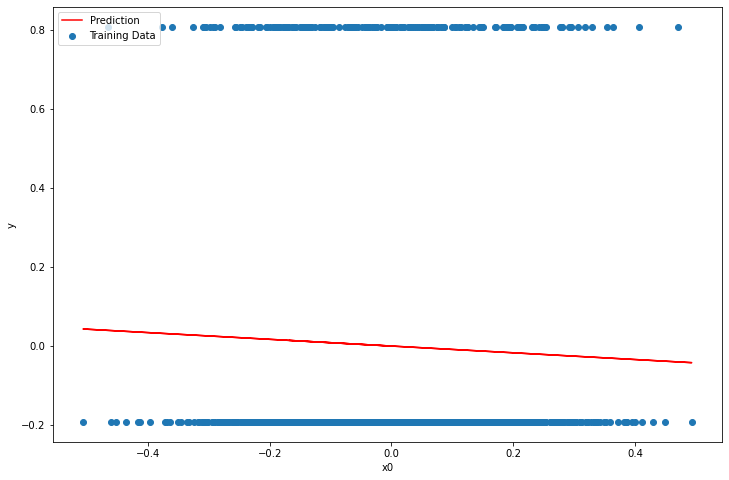

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x,Model_new,'r',label='Prediction')
ax.scatter(data.x0,data.y,label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('x0')
ax.set_ylabel('y')


Text(0.5, 1.0, 'Error vs. Iterations')

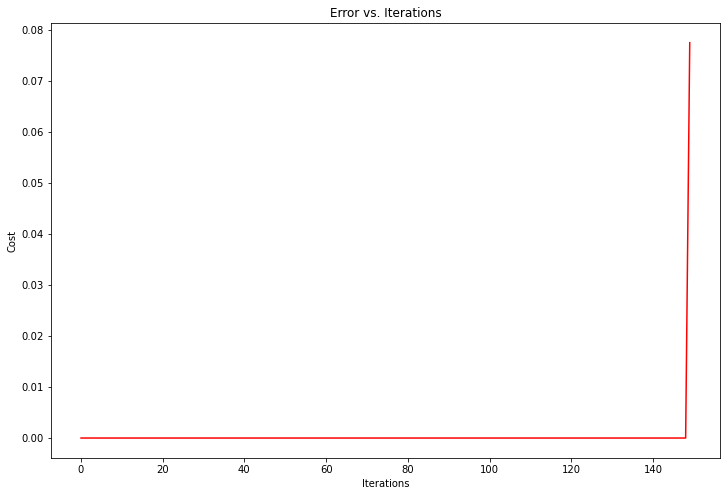

In [26]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Iterations')

In [27]:
import math
erro_r = [np.power((b-a),2) for (a,b) in zip(Model_new ,y)]
error0 = np.sum(erro_r)
error = (error0/len(y))*100
print("error % ={}".format(error))
accuracy = 100-error
print("accuracy%={}".format(accuracy))

error % =15.50392587705133
accuracy%=84.49607412294867


In [28]:
def predict(new_theta,accuracy):
    x0 = float(input("Enter the x0 value:"))
    x0 = (x0 - data.x0.mean())/(data.x0.max()-data.x0.min())
    y = (new_theta[0,0]+(new_theta[0,1]*x0))
    Predicted = (y*(data.y.max()-data.y.min()))+(data.y.mean())
    Max_Accuracy = (Predicted*(1/accuracy)*100)
    size_range = Max_Accuracy - Predicted
    return Predicted, size_range

In [29]:
Predicted, size_range = predict(new_theta,accuracy)
print('Your y values is == '+str(Predicted)+'(+ or -) '+str(size_range))

Enter the x0 value:12
Your y values is == -1.0218324946899016(+ or -) -0.18749291515464583
